<a href="https://colab.research.google.com/github/bely66/CV_EX/blob/master/BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Batch Normalization (BN)

**Paper** [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/pdf/1502.03167.pdf) 

**Introduction**  
Batch normalization can be interpreted as conducting preprocessing at every layer of the network, where it is integrated into the network via a simple differentiable way.
Batch Normalization,  is one of the most important techniques for deep learning, developed by Ioffe and Szegedy, that makes the neural network much robust to the choice of hyper parameters, by enforcing the activations of  a layer to take a Gaussian distribution. 
When training even a simple model, normalizing (or standardizing) the input data (or features) can  speed up the training  process, where standardizing transforms data to have a mean of zero and a standard deviation of 1. Intuitively, without normalization of the input features, the cost function could be elongated in one direction than the other, making it difficult for optimization to find a minima (requires more steps and smaller learning rate.) 


**Why BN works**  
Covariate Shift: "When the input distribution to a learning system changes, it is said to experience covariate shift (Shimodaira, 2000). This is typically handled via domain adaptation (Jiang, 2008). However, the notion of covariate shift can be extended beyond the learning system as a whole, to apply to its parts, such as a sub-network or a layer"
Internal Covariate Shift: BN draws its strength from making normalization a part of the model architecture and performing the normalization for each training mini-batch. 
BN allows each layer of network to learn a little bit more independently of other layers, which speeds the learning.


By: [Ibrahim Sobh](https://www.linkedin.com/in/ibrahim-sobh-phd-8681757/)


## Basic Code

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import os
import pickle
from numpy.random import seed
from matplotlib import pyplot as plt
seed(13)

Using TensorFlow backend.


In [0]:
batch_size = 32
num_classes = 10
epochs = 20

In [0]:
# Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170500096/170498071 [==============================] - 11s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Without Batch Normalization (BN)

In [0]:
# Model 
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0        

In [0]:
# Train
history1 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/20





50000/50000 [==============================] - 24s 472us/step - loss: 1.8346 - acc: 0.3284 - val_loss: 1.5850 - val_acc: 0.4279
Epoch 2/20
50000/50000 [==============================] - 10s 190us/step - loss: 1.4887 - acc: 0.4565 - val_loss: 1.3262 - val_acc: 0.5287
Epoch 3/20
50000/50000 [==============================] - 9s 188us/step - loss: 1.3478 - acc: 0.5172 - val_loss: 1.3150 - val_acc: 0.5327
Epoch 4/20
50000/50000 [==============================] - 9s 189us/step - loss: 1.2537 - acc: 0.5555 - val_loss: 1.1517 - val_acc: 0.5909
Epoch 5/20
50000/50000 [==============================] - 9s 187us/step - loss: 1.1748 - acc: 0.5843 - val_loss: 1.0603 - val_acc: 0.6263
Epoch 6/20
50000/50000 [==============================] - 9s 189us/step - loss: 1.1039 - acc: 0.6114 - val_loss: 1.0419 - val_acc: 0.6364
Epoch 7/20
50000/5

## Without Batch Normalization (BN)

In [0]:
model_bn = Sequential()
model_bn.add(Conv2D(32, (3, 3), padding='same', use_bias=False,
                 input_shape=x_train.shape[1:]))
model_bn.add(BatchNormalization())
model_bn.add(Activation('relu'))

model_bn.add(Conv2D(32, (3, 3), use_bias=False))
model_bn.add(BatchNormalization())
model_bn.add(Activation('relu'))
model_bn.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model_bn.add(Conv2D(64, (3, 3), use_bias=False, padding='same'))
model_bn.add(BatchNormalization())
model_bn.add(Activation('relu'))
model_bn.add(Conv2D(64, (3, 3), use_bias=False))
model_bn.add(BatchNormalization())
model_bn.add(Activation('relu'))
model_bn.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model_bn.add(Flatten())
model_bn.add(Dense(512, use_bias=False))
model_bn.add(BatchNormalization())
model_bn.add(Activation('relu'))
#model.add(Dropout(0.5))
model_bn.add(Dense(num_classes, use_bias=False))
model_bn.add(BatchNormalization())
model_bn.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

model_bn.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_bn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        864       
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_20 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 30, 30, 32)        9216      
_________________________________________________________________
batch_normalization_15 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_21 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)       

In [0]:
# Train
history2 = model_bn.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 16s 329us/step - loss: 1.1857 - acc: 0.6027 - val_loss: 1.1213 - val_acc: 0.6182
Epoch 2/20
50000/50000 [==============================] - 15s 308us/step - loss: 0.8198 - acc: 0.7284 - val_loss: 0.9249 - val_acc: 0.6769
Epoch 3/20
50000/50000 [==============================] - 15s 307us/step - loss: 0.6595 - acc: 0.7815 - val_loss: 0.8612 - val_acc: 0.7097
Epoch 4/20
50000/50000 [==============================] - 15s 303us/step - loss: 0.5469 - acc: 0.8193 - val_loss: 0.7630 - val_acc: 0.7477
Epoch 5/20
50000/50000 [==============================] - 15s 303us/step - loss: 0.4505 - acc: 0.8508 - val_loss: 0.7530 - val_acc: 0.7418
Epoch 6/20
50000/50000 [==============================] - 15s 304us/step - loss: 0.3608 - acc: 0.8835 - val_loss: 0.6652 - val_acc: 0.7835
Epoch 7/20
50000/50000 [==============================] - 15s 304us/step - loss: 0.2972 - acc: 0.9059 - val_loss: 0.

## Compare

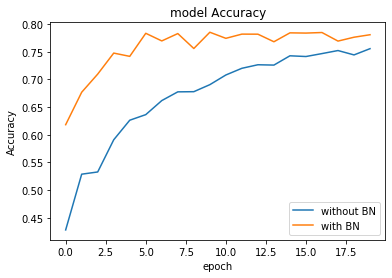

In [0]:
plt.plot(history1.history['val_acc'])
plt.plot(history2.history['val_acc'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['without BN', 'with BN'], loc='lower right')